# Comparison: Legacy API vs. Updated API for dff traces

This notebook demonstreates the differences between updated dff traces API (allensdk >= 1.0), as compared against the legacy dff traces API (allensdk < 1.0).  We highlight the differences by plotting the dff vs timestamps from the `BehaviorOphysSession` object; we have back-ported the legacy API into this object for convenience (previously this interface was implemented with the methods `get_dff_traces`, `get_cell_specimen_indices`, and `get_cell_specimen_ids` on the `BehaviorOphysNwbApi` object).

In [1]:
import matplotlib.pyplot as plt

from allensdk.brain_observatory.behavior.session_apis.data_io import BehaviorOphysLimsApi
from allensdk.brain_observatory.behavior.behavior_ophys_session import BehaviorOphysSession


%matplotlib notebook

In [2]:
ophys_experiment_id = 792813858
cell_specimen_id = 817111851

api = BehaviorOphysLimsApi(ophys_experiment_id)
session = BehaviorOphysSession(api)

## Updated API:

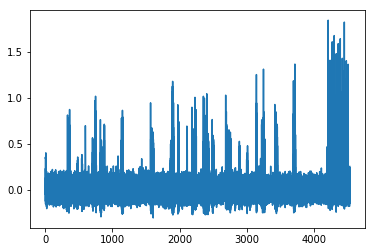

In [3]:
dff_trace = session.dff_traces.loc[cell_specimen_id]['dff']
timestamps = session.ophys_timestamps

_ = plt.plot(timestamps, dff_trace)

## Legacy API:

/home/nicholasc/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Function get_dff_traces is provided for backward-compatibilty with a legacy API, and may be removed in the future. Consider using "get_dff_timeseries" instead.
  """Entry point for launching an IPython kernel.
/home/nicholasc/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Function get_cell_specimen_indices is provided for backward-compatibilty with a legacy API, and may be removed in the future. 
  


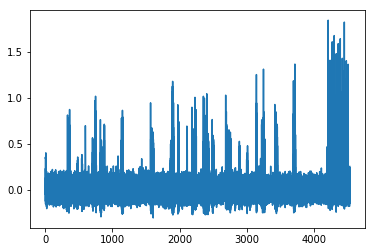

In [6]:
timestamps, dff_array = session.get_dff_traces()
ind = session.get_cell_specimen_indices([cell_specimen_id])[0]
dff_trace = dff_array[ind, :]
_ = plt.plot(timestamps, dff_trace)